# Telecom Churn Prediction Dataset


# Data Loading & Analyzing

In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np


In [ ]:
# Load data
df = pd.read_csv("/content/sample_data/Telco_Churn.csv")

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Preprocessing, cleaning and wrangling

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Drop customer ID
df.drop('customerID', axis=1, inplace=True)



In [ ]:
# Convert TotalCharges from string to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#fillna with median values
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [ ]:
# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


# Feature Engineering

In [ ]:
# Feature engineering
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']
df['AvgMonthlySpend'] = df['AvgMonthlySpend'].replace([np.inf, -np.inf], 0)
df['tenure_bucket'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72],
                             labels=['0-12', '13-24', '25-48', '49-72'])



In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)


<ipython-input-25-b9080991d3ee>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


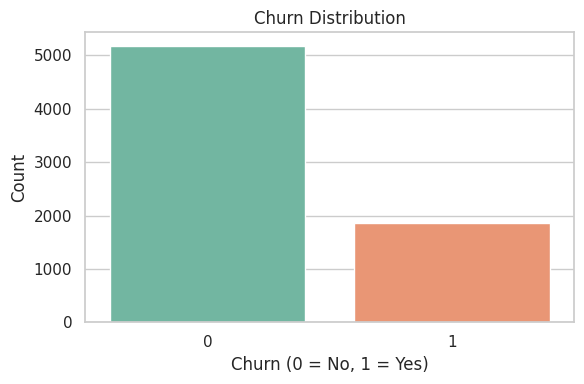

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




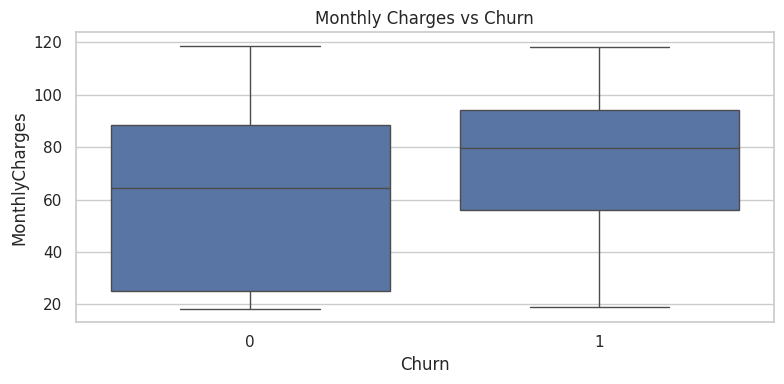

In [ ]:
# 2. Monthly Charges by Churn
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.tight_layout()
plt.show()

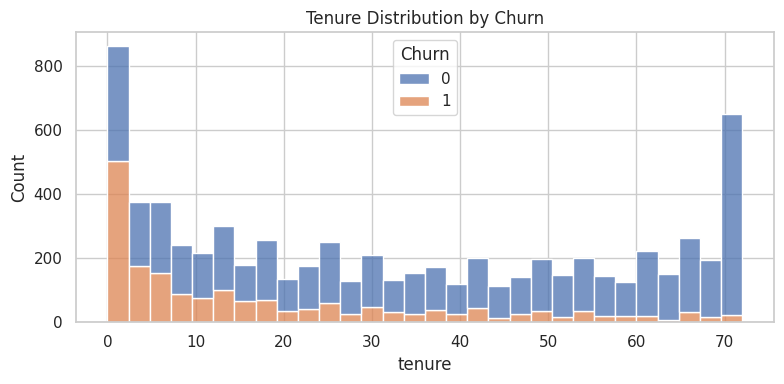

In [ ]:
# 3. Tenure Distribution by Churn
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Tenure Distribution by Churn")
plt.tight_layout()
plt.show()



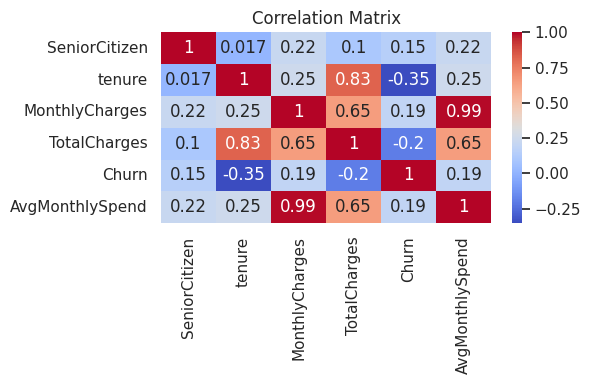

In [ ]:
# 4. Correlation Heatmap (numeric features)
plt.figure(figsize=(6, 4))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()



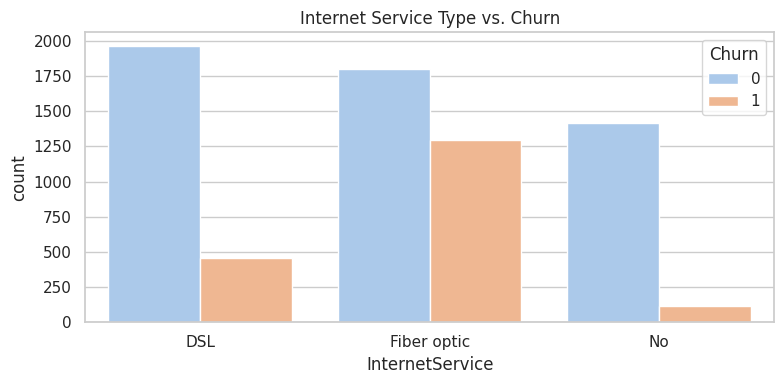

In [ ]:
# 5. Internet Service Type vs. Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='pastel')
plt.title("Internet Service Type vs. Churn")
plt.tight_layout()
plt.show()

# Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


In [ ]:
# Features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model Training & Testing

In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)



In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
print("Logistic Accuracy:", accuracy_score(y_test, logreg_preds))

# Accuracy
from sklearn.metrics import accuracy_score
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))



Logistic Accuracy: 0.8147622427253371
XGBoost Accuracy: 0.7906316536550745


# Evaluation Report

In [ ]:

# Evaluation
logreg_report = classification_report(y_test, logreg_preds)
xgb_report = classification_report(y_test, xgb_preds)

print("LogReg Accuracy:",logreg_report)
print("XGBoost Accuracy:",xgb_report)

LogReg Accuracy:               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

XGBoost Accuracy:               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.62      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



##For future advance modelling we can also use **CatBoost**


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))

CatBoost Accuracy: 0.8069552874378992
